<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [1]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2.0 Gerando dataframes

### Preparando dataframe e gerando features Sentilex

In [2]:
from dateutil import parser

In [3]:
dicionario_mes_2021 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}
dicionario_mes_2020 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dez':'12'}
dicionario_mes_2022 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06'}

df = pd.DataFrame()

for i in dicionario_mes_2020.keys():
    arquivo = "dataset-2020/" + dicionario_mes_2020[i] + "_GoogleNews_Petr_" + i + "-2020.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

for i in dicionario_mes_2021.keys():
    arquivo = "dataset-2021/" + dicionario_mes_2021[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)


for i in dicionario_mes_2022.keys():
    arquivo = "dataset-2022/" + dicionario_mes_2022[i] + "_GoogleNews_Petr_" + i + "_22.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])

## Filtrando para pegar apenas os 3 primeiros meses de 2022
#df = df[(df['date'] <= parser.parse('2022-03-31'))]


## Lendo pregoes
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro_2020 = pd.read_csv('dataset-2020/Hist_Preço_Petr_2020_.csv', sep='|')
df_petro_2022 = pd.read_csv('dataset-2022/Hist_Preço_Petr_2022_.csv', sep='|')
df_petro = df_petro_2020.append(df_petro,ignore_index=True)
df_petro = df_petro.append(df_petro_2022,ignore_index=True)



#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])


from datetime import datetime

## Gerando uma lista com todos os dias:
start_date = '01/01/2020'
end_date = '31/12/2022'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]


##Datas
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df
data_df['index'] = pd.to_datetime(data_df['index'])
data_df.columns = ['Datas', 'Num_Noticias']
data_df['Mes'] = data_df['Datas'].dt.month

#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

#Gerando lista com todas as datas sem noticias em 2021
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]

datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]




df['title'] = df['title'].apply(lambda x: x.lower())
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df = df[(df['title'] != "")]

df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)




lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)
    
    
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)




## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        

df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)
        

        
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')

df_final = df_final.dropna()
df_final = df_final[(df_final['Noticias'] != "")]



#### Gerando features Sentilex


sentilexpt = open('Versoes dicionarios sentilex/SentiLex-lem-PT01 editado v65_1.txt','r',encoding='utf-8-sig')

dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    

def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

df_final2 = df_final.copy()

df_final2['score'] = df_final2['Noticias'].apply(lambda x: Score_sentimento(x))
df_final2



,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,1
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,-2
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,-1
...,...,...,...,...,...,...,...
595,2022-05-27,30.60,118295600,-0.05,0,bolsonaro defende direito de mudar ceo da pet...,6
596,2022-05-30,29.99,98110100,-0.02,0,lira sugere que governo venda ações da petro...,-1
597,2022-05-31,30.06,83598000,0.00,1,bolsonaro diz que quer fatiar a petrobras bol...,4
598,2022-06-01,30.02,46353200,-0.00,0,petrobras diz que oferta de ações da braskem ...,3


### Traduzindo e gerando features Finbert e Roberta

In [4]:
### Traduzindo noticias
from googletrans import Translator
trans = Translator()
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

df_final3 = df_final.copy()
df_final3['Noticias'] = df_final3['Noticias'].apply(lambda x: traduzir(x))

#### Gerando features Roberta
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

df_final4 = df_final.copy()
df_final4['Noticias'] = df_final3['Noticias']
df_final4['neu_rob'] = df_final4['Noticias'].apply(lambda x: neu_rob(str(x)))


#### Gerando features Finbert

#pip install transformers

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

df_bert = df_final.copy()
df_bert['Noticias'] = df_final3['Noticias']

def sentimento_finbert_neg(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Negative":
        score = -1*dict_results.get('score')
    else:
        score = 0
        
    return score

df_bert['neg_finbert'] = df_bert['Noticias'].apply(lambda x: sentimento_finbert_neg(x))

### Gerando features de dias anteriores

In [38]:
# Sentilex + Vader
df_final8 = df_final3.merge(df_final2, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
# + Roberta
df_final8 = df_final8.merge(df_final4, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])
# +Finbert
df_final8 = df_final8.merge(df_bert, how = 'left', on = ['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento'])


df_final99 = df_final8.copy()

features = ['score', 'neu_rob','neg_finbert']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final99[i+"d1"] = 0
    df_final99[i+"d2"] = 0
    df_final99[i+"d3"] = 0
    df_final99[i+"d4"] = 0


import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final99[b] = df_final99.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final99[b] = df_final99.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final99[b] = df_final99.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final99[b] = df_final99.shift(periods=4)[a]


df_final99 = df_final99.dropna()

# 3.0 Retreinando todos modelos de ML e Ensemble dos experimentos anteriores

## Treina e avalia sobre os dados de 2022

In [81]:
treinar_ate_data_str = '2021-12-31'

## Dados de treino (até dezembro a data definida por treinar_ate_data_str)
X = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['Fechamento']]

X_train = X
y_train = y

## Dados de teste (a partir da data definida por treinar_ate_data_str)
X_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['Fechamento']]


## Retreina os modelos

linearsvc =  LinearSVC(penalty='l2', loss='hinge',dual=True, C=1.4)
linearsvc.fit(X_train,y_train)

ridgecv = RidgeClassifierCV(alphas = [0.001, 0.01, 0.1, 1], fit_intercept=True, normalize=True, cv=12)
ridgecv.fit(X_train,y_train)

logreg = LogisticRegression(penalty= 'l1', C=28, fit_intercept=True, solver = 'liblinear')
logreg.fit(X_train,y_train)

ridge = RidgeClassifier(alpha=1.7,fit_intercept=True,normalize=False, solver = 'lsqr' )
ridge.fit(X_train,y_train)

clfs = [logreg,ridge,ridgecv,linearsvc]
ensemblevote = EnsembleVoteClassifier(clfs, weights = [2,1,2,1]) 
ensemblevote.fit(X_train,y_train)

nearestcentroid = NearestCentroid(metric = 'euclidean', shrink_threshold = 0.18)
nearestcentroid.fit(X_train,y_train)

svc = SVC(C=1.46, kernel = 'linear', gamma = 'auto')
svc.fit(X_train,y_train)
    
lineardisc = LinearDiscriminantAnalysis(solver = 'eigen', n_components = 1)
lineardisc.fit(X_train,y_train)

bernoullinb = BernoulliNB(alpha=100,binarize=0,fit_prior=True)
bernoullinb.fit(X_train,y_train)

gaussiannb = GaussianNB(var_smoothing = 0.0001)
gaussiannb.fit(X_train,y_train)

lgbm = LGBMClassifier(max_depth=180,learning_rate=0.01,n_estimators=250, num_leaves=5)
lgbm.fit(X_train,y_train)

extratree = ExtraTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 25, min_samples_split=20, min_samples_leaf=2)
extratree.fit(X_train,y_train)

rf = RandomForestClassifier(max_depth=10, min_samples_split=15,min_samples_leaf=1,criterion='entropy')
rf.fit(X_train,y_train)

xgb = XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=86)
xgb.fit(X_train,y_train)

quadratic = QuadraticDiscriminantAnalysis(reg_param=0,store_covariance=True, tol=0.0000000001)
quadratic.fit(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'brute', metric = 'manhattan')
knn.fit(X_train,y_train)

#Definição de listas com modelos

models = [linearsvc,ridgecv,logreg,ridge,ensemblevote,nearestcentroid,svc,lineardisc,bernoullinb,gaussiannb,lgbm,extratree,rf,xgb,quadratic,knn]
nome_modelo = ['linearsvc','ridgecv','logreg','ridge','ensemblevote','nearestcentroid','svc','lineardisc','bernoullinb','gaussiannb','lgbm','extratree','rf','xgb','quadratic','knn']


#Lista para armazenar resultados dos modelos
resultados = []


#Iterando sobre todos os modelos
for a,b in zip(models,nome_modelo):
    
    #Predizendo 2022
    y_pred = a.predict(X_test)
    
    #Calculando o recall
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)

    #Calculando acurácia 
    accuracy = accuracy_score(y_test, y_pred)

    #Calculando acurácia balanceada
    accuracy_balanced = balanced_accuracy_score(y_test, y_pred)

    #calculando f1_score
    f1_0 = f1_score(y_test, y_pred,pos_label=0)
    f1_1 = f1_score(y_test, y_pred,pos_label=1)

    #Calculando AUC
    auc = roc_auc_score(y_test, y_pred)
    
    # Adicionando todos resultados em uma única lista
    resultados.append(np.array([b,accuracy,accuracy_balanced,recall_0,recall_1,f1_0,f1_1,auc]))

    
#Visualiza os resultados em formato dataframe
resultados_df = pd.DataFrame(np.array(resultados), columns=['Modelo','acuracia','acuracia_balanceada','recall_0','recall_1','f1_0','f1_1','auc'])
resultados_df['auc'] = resultados_df['auc'].astype(float, errors = 'raise')
resultados_df.sort_values(by='auc', ascending=False)

,Modelo,acuracia,acuracia_balanceada,recall_0,recall_1,f1_0,f1_1,auc
10,lgbm,0.569620253164557,0.5699614890885751,0.5789473684210527,0.5609756097560976,0.5641025641025641,0.575,0.57
9,gaussiannb,0.569620253164557,0.5680359435173299,0.5263157894736842,0.6097560975609756,0.5405405405405405,0.5952380952380952,0.57
5,nearestcentroid,0.5569620253164557,0.5558408215661104,0.5263157894736842,0.5853658536585366,0.5333333333333333,0.5783132530120483,0.56
0,linearsvc,0.5443037974683544,0.5436456996148908,0.5263157894736842,0.5609756097560976,0.5263157894736842,0.5609756097560976,0.54
6,svc,0.5443037974683544,0.5436456996148908,0.5263157894736842,0.5609756097560976,0.5263157894736842,0.5609756097560976,0.54
8,bernoullinb,0.5443037974683544,0.5436456996148908,0.5263157894736842,0.5609756097560976,0.5263157894736842,0.5609756097560976,0.54
1,ridgecv,0.5443037974683544,0.5426829268292683,0.5,0.5853658536585366,0.5135135135135136,0.5714285714285714,0.54
2,logreg,0.5443037974683544,0.5426829268292683,0.5,0.5853658536585366,0.5135135135135136,0.5714285714285714,0.54
3,ridge,0.5443037974683544,0.5426829268292683,0.5,0.5853658536585366,0.5135135135135136,0.5714285714285714,0.54
4,ensemblevote,0.5443037974683544,0.5426829268292683,0.5,0.5853658536585366,0.5135135135135136,0.5714285714285714,0.54


## Avaliando matriz de confusao dos algorítmos

In [90]:
for a,b in zip(models,nome_modelo):
    
    #Predizendo 2022
    y_pred = a.predict(X_test) 
    print("Classification Report - %s " % (b))
    print(classification_report(y_test,y_pred))

Classification Report - linearsvc 
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        38
           1       0.56      0.56      0.56        41

    accuracy                           0.54        79
   macro avg       0.54      0.54      0.54        79
weighted avg       0.54      0.54      0.54        79

Classification Report - ridgecv 
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        38
           1       0.56      0.59      0.57        41

    accuracy                           0.54        79
   macro avg       0.54      0.54      0.54        79
weighted avg       0.54      0.54      0.54        79

Classification Report - logreg 
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        38
           1       0.56      0.59      0.57        41

    accuracy                           0.54        79
   macro avg       0.54     

# 4.0 Avaliando resultados com algorítmos ingênuos para avaliar se é necessário realizar nova etapa de tunagem

In [250]:
data_stop = '2022-06-05' ## Definido como 1 dia antes de: df_final99.Date.max() 
treinar_ate_data_str = '2021-12-31'
df_models = pd.DataFrame()
resultados = []
    
while treinar_ate_data_str != data_stop:
    print("Dados de treino até %s, com dados de teste de %s á %s" % (treinar_ate_data_str,treinar_ate_data_str,data_stop))

    ## Dados de treino (até a data definida por treinar_ate_data_str)
    X = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
    y = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['Fechamento']]

    X_train = X
    y_train = y

    ## Dados de teste (a partir da data definida por treinar_ate_data_str)
    X_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
    y_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['Fechamento']]


    #Algorítmos ingênuos
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test) 
       
    
    #Atualiza a variável
    treinar_ate_data_str = parser.parse(treinar_ate_data_str) + timedelta(1) ## Soma 1 dia
    treinar_ate_data_str = treinar_ate_data_str.strftime("%Y-%m-%d") ## Transforma pra string
    
    ## Armazena os resultados
    models['data'] = treinar_ate_data_str
    df_models = df_models.append(models.reset_index(), ignore_index=True)
    
    

    #dataframe1 = models.transpose()
    #b_accuracy = dataframe1.iloc[1].values.tolist()  ## Lista com valores da acuracia balanceada de todos 29 algoritmos
    #nome_modelos = dataframe1.columns.tolist() # Lista com o nome dos 29 algoritmos
    #resultados_dia = [treinar_ate_data_str] + b_accuracy # Lista com os resultados do dia
    
    #resultados.append(np.array(resultados_dia))
    


Dados de treino até 2021-12-31, com dados de teste de 2021-12-31 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.01it/s]


Dados de treino até 2022-01-01, com dados de teste de 2022-01-01 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.48it/s]


Dados de treino até 2022-01-02, com dados de teste de 2022-01-02 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.64it/s]


Dados de treino até 2022-01-03, com dados de teste de 2022-01-03 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Dados de treino até 2022-01-04, com dados de teste de 2022-01-04 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Dados de treino até 2022-01-05, com dados de teste de 2022-01-05 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.56it/s]


Dados de treino até 2022-01-06, com dados de teste de 2022-01-06 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.58it/s]


Dados de treino até 2022-01-07, com dados de teste de 2022-01-07 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.77it/s]


Dados de treino até 2022-01-08, com dados de teste de 2022-01-08 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.79it/s]


Dados de treino até 2022-01-09, com dados de teste de 2022-01-09 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.88it/s]


Dados de treino até 2022-01-10, com dados de teste de 2022-01-10 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.33it/s]


Dados de treino até 2022-01-11, com dados de teste de 2022-01-11 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.91it/s]


Dados de treino até 2022-01-12, com dados de teste de 2022-01-12 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.70it/s]


Dados de treino até 2022-01-13, com dados de teste de 2022-01-13 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Dados de treino até 2022-01-14, com dados de teste de 2022-01-14 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.41it/s]


Dados de treino até 2022-01-15, com dados de teste de 2022-01-15 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.59it/s]


Dados de treino até 2022-01-16, com dados de teste de 2022-01-16 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.24it/s]


Dados de treino até 2022-01-17, com dados de teste de 2022-01-17 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.75it/s]


Dados de treino até 2022-01-18, com dados de teste de 2022-01-18 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.73it/s]


Dados de treino até 2022-01-19, com dados de teste de 2022-01-19 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.94it/s]


Dados de treino até 2022-01-20, com dados de teste de 2022-01-20 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.49it/s]


Dados de treino até 2022-01-21, com dados de teste de 2022-01-21 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.74it/s]


Dados de treino até 2022-01-22, com dados de teste de 2022-01-22 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Dados de treino até 2022-01-23, com dados de teste de 2022-01-23 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.28it/s]


Dados de treino até 2022-01-24, com dados de teste de 2022-01-24 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.79it/s]


Dados de treino até 2022-01-25, com dados de teste de 2022-01-25 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.74it/s]


Dados de treino até 2022-01-26, com dados de teste de 2022-01-26 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.92it/s]


Dados de treino até 2022-01-27, com dados de teste de 2022-01-27 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.29it/s]


Dados de treino até 2022-01-28, com dados de teste de 2022-01-28 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.69it/s]


Dados de treino até 2022-01-29, com dados de teste de 2022-01-29 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.20it/s]


Dados de treino até 2022-01-30, com dados de teste de 2022-01-30 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.38it/s]


Dados de treino até 2022-01-31, com dados de teste de 2022-01-31 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


Dados de treino até 2022-02-01, com dados de teste de 2022-02-01 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.13it/s]


Dados de treino até 2022-02-02, com dados de teste de 2022-02-02 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.21it/s]


Dados de treino até 2022-02-03, com dados de teste de 2022-02-03 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.35it/s]


Dados de treino até 2022-02-04, com dados de teste de 2022-02-04 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Dados de treino até 2022-02-05, com dados de teste de 2022-02-05 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.12it/s]


Dados de treino até 2022-02-06, com dados de teste de 2022-02-06 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.31it/s]


Dados de treino até 2022-02-07, com dados de teste de 2022-02-07 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.28it/s]


Dados de treino até 2022-02-08, com dados de teste de 2022-02-08 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.13it/s]


Dados de treino até 2022-02-09, com dados de teste de 2022-02-09 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.90it/s]


Dados de treino até 2022-02-10, com dados de teste de 2022-02-10 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.23it/s]


Dados de treino até 2022-02-11, com dados de teste de 2022-02-11 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.21it/s]


Dados de treino até 2022-02-12, com dados de teste de 2022-02-12 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.36it/s]


Dados de treino até 2022-02-13, com dados de teste de 2022-02-13 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.81it/s]


Dados de treino até 2022-02-14, com dados de teste de 2022-02-14 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.91it/s]


Dados de treino até 2022-02-15, com dados de teste de 2022-02-15 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


Dados de treino até 2022-02-16, com dados de teste de 2022-02-16 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.06it/s]


Dados de treino até 2022-02-17, com dados de teste de 2022-02-17 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.99it/s]


Dados de treino até 2022-02-18, com dados de teste de 2022-02-18 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.22it/s]


Dados de treino até 2022-02-19, com dados de teste de 2022-02-19 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.40it/s]


Dados de treino até 2022-02-20, com dados de teste de 2022-02-20 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.76it/s]


Dados de treino até 2022-02-21, com dados de teste de 2022-02-21 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.64it/s]


Dados de treino até 2022-02-22, com dados de teste de 2022-02-22 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.11it/s]


Dados de treino até 2022-02-23, com dados de teste de 2022-02-23 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.27it/s]


Dados de treino até 2022-02-24, com dados de teste de 2022-02-24 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.89it/s]


Dados de treino até 2022-02-25, com dados de teste de 2022-02-25 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.27it/s]


Dados de treino até 2022-02-26, com dados de teste de 2022-02-26 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.79it/s]


Dados de treino até 2022-02-27, com dados de teste de 2022-02-27 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.34it/s]


Dados de treino até 2022-02-28, com dados de teste de 2022-02-28 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.29it/s]


Dados de treino até 2022-03-01, com dados de teste de 2022-03-01 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.46it/s]


Dados de treino até 2022-03-02, com dados de teste de 2022-03-02 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.80it/s]


Dados de treino até 2022-03-03, com dados de teste de 2022-03-03 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.74it/s]


Dados de treino até 2022-03-04, com dados de teste de 2022-03-04 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Dados de treino até 2022-03-05, com dados de teste de 2022-03-05 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.98it/s]


Dados de treino até 2022-03-06, com dados de teste de 2022-03-06 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.07it/s]


Dados de treino até 2022-03-07, com dados de teste de 2022-03-07 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.54it/s]


Dados de treino até 2022-03-08, com dados de teste de 2022-03-08 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.94it/s]


Dados de treino até 2022-03-09, com dados de teste de 2022-03-09 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.99it/s]


Dados de treino até 2022-03-10, com dados de teste de 2022-03-10 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.04it/s]


Dados de treino até 2022-03-11, com dados de teste de 2022-03-11 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.79it/s]


Dados de treino até 2022-03-12, com dados de teste de 2022-03-12 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.10it/s]


Dados de treino até 2022-03-13, com dados de teste de 2022-03-13 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.96it/s]


Dados de treino até 2022-03-14, com dados de teste de 2022-03-14 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.39it/s]


Dados de treino até 2022-03-15, com dados de teste de 2022-03-15 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


Dados de treino até 2022-03-16, com dados de teste de 2022-03-16 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.22it/s]


Dados de treino até 2022-03-17, com dados de teste de 2022-03-17 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.49it/s]


Dados de treino até 2022-03-18, com dados de teste de 2022-03-18 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.91it/s]


Dados de treino até 2022-03-19, com dados de teste de 2022-03-19 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.62it/s]


Dados de treino até 2022-03-20, com dados de teste de 2022-03-20 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.46it/s]


Dados de treino até 2022-03-21, com dados de teste de 2022-03-21 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Dados de treino até 2022-03-22, com dados de teste de 2022-03-22 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.61it/s]


Dados de treino até 2022-03-23, com dados de teste de 2022-03-23 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.51it/s]


Dados de treino até 2022-03-24, com dados de teste de 2022-03-24 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.47it/s]


Dados de treino até 2022-03-25, com dados de teste de 2022-03-25 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.97it/s]


Dados de treino até 2022-03-26, com dados de teste de 2022-03-26 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.06it/s]


Dados de treino até 2022-03-27, com dados de teste de 2022-03-27 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.74it/s]


Dados de treino até 2022-03-28, com dados de teste de 2022-03-28 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.21it/s]


Dados de treino até 2022-03-29, com dados de teste de 2022-03-29 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.30it/s]


Dados de treino até 2022-03-30, com dados de teste de 2022-03-30 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


Dados de treino até 2022-03-31, com dados de teste de 2022-03-31 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.90it/s]


Dados de treino até 2022-04-01, com dados de teste de 2022-04-01 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.55it/s]


Dados de treino até 2022-04-02, com dados de teste de 2022-04-02 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.82it/s]


Dados de treino até 2022-04-03, com dados de teste de 2022-04-03 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.81it/s]


Dados de treino até 2022-04-04, com dados de teste de 2022-04-04 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.60it/s]


Dados de treino até 2022-04-05, com dados de teste de 2022-04-05 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.96it/s]


Dados de treino até 2022-04-06, com dados de teste de 2022-04-06 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.68it/s]


Dados de treino até 2022-04-07, com dados de teste de 2022-04-07 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.43it/s]


Dados de treino até 2022-04-08, com dados de teste de 2022-04-08 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.07it/s]


Dados de treino até 2022-04-09, com dados de teste de 2022-04-09 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


Dados de treino até 2022-04-10, com dados de teste de 2022-04-10 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.63it/s]


Dados de treino até 2022-04-11, com dados de teste de 2022-04-11 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.56it/s]


Dados de treino até 2022-04-12, com dados de teste de 2022-04-12 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.45it/s]


Dados de treino até 2022-04-13, com dados de teste de 2022-04-13 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.71it/s]


Dados de treino até 2022-04-14, com dados de teste de 2022-04-14 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.71it/s]


Dados de treino até 2022-04-15, com dados de teste de 2022-04-15 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.23it/s]


Dados de treino até 2022-04-16, com dados de teste de 2022-04-16 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Dados de treino até 2022-04-17, com dados de teste de 2022-04-17 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.85it/s]


Dados de treino até 2022-04-18, com dados de teste de 2022-04-18 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.29it/s]


Dados de treino até 2022-04-19, com dados de teste de 2022-04-19 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.21it/s]


Dados de treino até 2022-04-20, com dados de teste de 2022-04-20 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.98it/s]


Dados de treino até 2022-04-21, com dados de teste de 2022-04-21 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.55it/s]


Dados de treino até 2022-04-22, com dados de teste de 2022-04-22 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.84it/s]


Dados de treino até 2022-04-23, com dados de teste de 2022-04-23 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.96it/s]


Dados de treino até 2022-04-24, com dados de teste de 2022-04-24 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.29it/s]


Dados de treino até 2022-04-25, com dados de teste de 2022-04-25 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.87it/s]


Dados de treino até 2022-04-26, com dados de teste de 2022-04-26 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.24it/s]


Dados de treino até 2022-04-27, com dados de teste de 2022-04-27 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.21it/s]


Dados de treino até 2022-04-28, com dados de teste de 2022-04-28 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.21it/s]


Dados de treino até 2022-04-29, com dados de teste de 2022-04-29 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.63it/s]


Dados de treino até 2022-04-30, com dados de teste de 2022-04-30 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.26it/s]


Dados de treino até 2022-05-01, com dados de teste de 2022-05-01 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.39it/s]


Dados de treino até 2022-05-02, com dados de teste de 2022-05-02 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.57it/s]


Dados de treino até 2022-05-03, com dados de teste de 2022-05-03 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.31it/s]


Dados de treino até 2022-05-04, com dados de teste de 2022-05-04 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.20it/s]


Dados de treino até 2022-05-05, com dados de teste de 2022-05-05 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.66it/s]


Dados de treino até 2022-05-06, com dados de teste de 2022-05-06 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.50it/s]


Dados de treino até 2022-05-07, com dados de teste de 2022-05-07 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.41it/s]


Dados de treino até 2022-05-08, com dados de teste de 2022-05-08 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.15it/s]


Dados de treino até 2022-05-09, com dados de teste de 2022-05-09 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.92it/s]


Dados de treino até 2022-05-10, com dados de teste de 2022-05-10 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.27it/s]


Dados de treino até 2022-05-11, com dados de teste de 2022-05-11 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.13it/s]


Dados de treino até 2022-05-12, com dados de teste de 2022-05-12 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.86it/s]


Dados de treino até 2022-05-13, com dados de teste de 2022-05-13 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.55it/s]


Dados de treino até 2022-05-14, com dados de teste de 2022-05-14 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.20it/s]


Dados de treino até 2022-05-15, com dados de teste de 2022-05-15 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.47it/s]


Dados de treino até 2022-05-16, com dados de teste de 2022-05-16 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.51it/s]


Dados de treino até 2022-05-17, com dados de teste de 2022-05-17 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.08it/s]


Dados de treino até 2022-05-18, com dados de teste de 2022-05-18 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.98it/s]


Dados de treino até 2022-05-19, com dados de teste de 2022-05-19 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.75it/s]


Dados de treino até 2022-05-20, com dados de teste de 2022-05-20 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.44it/s]


Dados de treino até 2022-05-21, com dados de teste de 2022-05-21 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.65it/s]


Dados de treino até 2022-05-22, com dados de teste de 2022-05-22 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.27it/s]


Dados de treino até 2022-05-23, com dados de teste de 2022-05-23 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.79it/s]


Dados de treino até 2022-05-24, com dados de teste de 2022-05-24 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.45it/s]


Dados de treino até 2022-05-25, com dados de teste de 2022-05-25 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.64it/s]


Dados de treino até 2022-05-26, com dados de teste de 2022-05-26 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.58it/s]


Dados de treino até 2022-05-27, com dados de teste de 2022-05-27 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.46it/s]


Dados de treino até 2022-05-28, com dados de teste de 2022-05-28 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.24it/s]


Dados de treino até 2022-05-29, com dados de teste de 2022-05-29 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.85it/s]


Dados de treino até 2022-05-30, com dados de teste de 2022-05-30 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.33it/s]


Dados de treino até 2022-05-31, com dados de teste de 2022-05-31 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.26it/s]


Dados de treino até 2022-06-01, com dados de teste de 2022-06-01 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.82it/s]


Dados de treino até 2022-06-02, com dados de teste de 2022-06-02 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.73it/s]


Dados de treino até 2022-06-03, com dados de teste de 2022-06-03 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.90it/s]


Dados de treino até 2022-06-04, com dados de teste de 2022-06-04 á 2022-06-05


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.70it/s]


In [274]:
df_models2 = df_models.copy()
df_models2['data'] = pd.to_datetime(df_models2['data'])
df_models2['Mes'] = df_models2['data'].dt.month 
df_models2

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,data,Mes
0,SVC,0.58,0.58,0.58,0.58,0.02,2022-01-01,1
1,GaussianNB,0.57,0.57,0.57,0.57,0.02,2022-01-01,1
2,BernoulliNB,0.56,0.56,0.56,0.56,0.03,2022-01-01,1
3,NearestCentroid,0.54,0.54,0.54,0.54,0.02,2022-01-01,1
4,LinearSVC,0.54,0.54,0.54,0.54,0.03,2022-01-01,1
...,...,...,...,...,...,...,...,...
4207,KNeighborsClassifier,0.00,0.00,None,0.00,0.02,2022-06-05,6
4208,GaussianNB,0.00,0.00,None,0.00,0.02,2022-06-05,6
4209,Perceptron,0.00,0.00,None,0.00,0.02,2022-06-05,6
4210,QuadraticDiscriminantAnalysis,0.00,0.00,None,0.00,0.02,2022-06-05,6


Text(2022-04-03 00:00:00, 0.85, 'SVC Model')

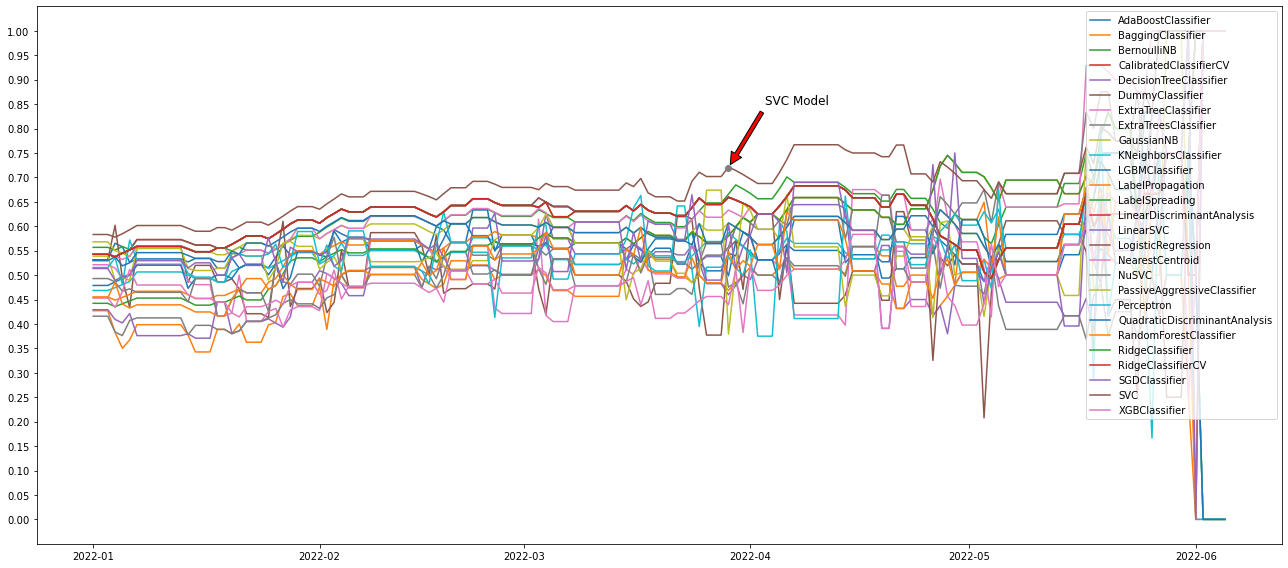

In [352]:
fig, ax = plt.subplots(figsize=(18,8))

# multiline plot with group by
for key, grp in df_models2.groupby(['Model']): 
    ax.plot(grp['data'], grp['Balanced Accuracy'], label = key)
ax.legend(loc='upper right',prop={'size': 10}) 
ax.set_yticks(np.arange(0, 1.05, step=0.05).tolist())


#ax.text(parser.parse('2022-03-29'), 0.72, 'No continuous trend observed', fontsize=15,  color='red')
ax.plot([parser.parse('2022-03-29')], [0.72], 'o')
ax.annotate('SVC Model', xy=(parser.parse('2022-03-29'), 0.72), xytext=(parser.parse('2022-04-03'), 0.85), fontsize=12,arrowprops=dict(facecolor='red', shrink=0.05))

In [372]:
df_models2[(df_models2['data']=='2022-03-29')]

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,data,Mes
2349,SVC,0.72,0.72,0.72,0.72,0.02,2022-03-29,3
2350,BernoulliNB,0.67,0.67,0.67,0.67,0.02,2022-03-29,3
2351,LinearSVC,0.67,0.66,0.66,0.66,0.02,2022-03-29,3
2352,LinearDiscriminantAnalysis,0.67,0.66,0.66,0.66,0.01,2022-03-29,3
2353,CalibratedClassifierCV,0.67,0.66,0.66,0.66,0.05,2022-03-29,3
2354,RidgeClassifier,0.67,0.66,0.66,0.66,0.02,2022-03-29,3
2355,RidgeClassifierCV,0.67,0.66,0.66,0.66,0.02,2022-03-29,3
2356,LogisticRegression,0.67,0.66,0.66,0.66,0.02,2022-03-29,3
2357,NearestCentroid,0.64,0.63,0.63,0.63,0.01,2022-03-29,3
2358,GaussianNB,0.61,0.61,0.61,0.61,0.02,2022-03-29,3


# Tunagem SVC:
O modelo SVC ja havia sido selecionado como um dos melhores ao treinar e testar com dados de 2020 e 2021 no notebook "Experimentos - Machine Learning".

O modelo SVC também se mostrou promissor avaliando sobre os dados de 2022. Portanto, iremos tunar apenas esse modelo uma vez que foi o que melhor performou sobre dados ainda não vistos.

- Dados de treinamento: Até de 2020-01-01 á 2022-03-29  
- Dados de testes: de 2022-03-30 á 2022-06-06

In [353]:
from sklearn.svm import SVC

In [354]:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [364]:
treinar_ate_data_str = '2022-03-29'

## Dados de treino (até a data definida por treinar_ate_data_str)
X = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['Fechamento']]

X_train = X
y_train = y

## Dados de teste (a partir da data definida por treinar_ate_data_str)
X_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['Fechamento']]

C = [1,0.1]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']


C = [1.5,2,5,10,100]
kernel = ['linear','poly']
gamma = ['scale', 'auto']

C = [20,30,40,50,60,70,80,90]
kernel = ['poly']
gamma = ['auto']

C = [6,7,8,9,10,11,12,13,14,15,16,17,18,19]
kernel = ['poly']
gamma = ['auto']

C = [11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9]
kernel = ['poly']
gamma = ['auto']



#C = [1.1,1.2,1.3,1.4,1.6,1.8,1.9]
#kernel = ['linear']
#gamma = ['scale', 'auto']

#C = [1.42,1.44,1.46,1.48,1.52,1.54,1.56,1.58]
#kernel = ['linear']
#gamma = ['scale', 'auto']



#Repete os experimentos 30x
for i in range(30):   
    
    #Holdout: Treinando apenas com 70% do dataset de treino
    X_train, X_descarte, y_train, y_descarte = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in C:
        
        # itera sobre parametro 2:
        for u in kernel:
            
            #itera sobre o parametro 3:
            for w in gamma:
        
                gs = GridSearchCV(
                    SVC(random_state=i) ,
                    param_grid={"C": [k], 
                                "kernel":[u],
                                "gamma":[w]}, 
                    scoring=scoring,
                    refit="bacuracy",
                    n_jobs=2,
                    return_train_score=True,
                    cv = kfold
                        )

                #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                gs.fit(X_train, y_train)

                #Melhores resultados e hiperparâmetros encontrados
                acuracy_treino = gs.best_score_
                hyperparams = gs.best_params_

                ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                y_test_pred = gs.predict(X_test)
                #y_test_pred_todos = gs.predict(X_todos)

                #Calculando acurácia 
                accuracy_teste = accuracy_score(y_test, y_test_pred)
                #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                #calculando f1_score da classe 1
                f1_teste = f1_score(y_test, y_test_pred)
                #f1_todos = f1_score(y_todos, y_test_pred_todos)

                #calculando área sobre a curva ROC_AUC:
                auc_teste = roc_auc_score(y_test, y_test_pred)
                #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                #Calculando Recall clase 1
                rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                #Calculando a acurácia balanceada
                accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                # Adicionando todos resultados em uma única lista
                resultados.append(np.array([i,hyperparams['C'],hyperparams['kernel'],hyperparams['gamma'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))

Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [365]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','C','kernel','gamma','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'C': 'str', 'kernel': 'str','gamma': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['C','kernel','gamma']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

,,,acuracy_treino,acuracia_teste,acuracia_balanceada_teste,rec_0_teste,rec_1_teste,f1_teste,auc_teste
C,kernel,gamma,,,,,,,
11.7,poly,auto,0.59,0.69,0.69,0.49,0.89,0.75,0.69
11.6,poly,auto,0.59,0.69,0.69,0.49,0.89,0.75,0.69
11.5,poly,auto,0.59,0.69,0.69,0.49,0.89,0.75,0.69
11.4,poly,auto,0.59,0.69,0.69,0.49,0.88,0.75,0.69
11.3,poly,auto,0.59,0.69,0.69,0.49,0.88,0.75,0.69
11.2,poly,auto,0.59,0.69,0.69,0.49,0.88,0.75,0.69
11.9,poly,auto,0.59,0.69,0.69,0.49,0.89,0.75,0.69
11.8,poly,auto,0.59,0.69,0.69,0.49,0.89,0.75,0.69
11.1,poly,auto,0.59,0.69,0.69,0.49,0.88,0.75,0.69


In [366]:
## Dados de treino (até a data definida por treinar_ate_data_str)
X = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['Fechamento']]

X_train = X
y_train = y

svc = SVC(C=11.7, kernel = 'poly', gamma = 'auto')
svc.fit(X_train,y_train)

SVC(C=11.7, gamma='auto', kernel='poly')

In [367]:
#Predizendo y
y_pred = svc.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.80      0.47      0.59        17
           1       0.64      0.89      0.74        18

    accuracy                           0.69        35
   macro avg       0.72      0.68      0.67        35
weighted avg       0.72      0.69      0.67        35


Confusion Matrix Dados de Producao:
 [[ 8  9]
 [ 2 16]]



## Tunagem Ridge

In [374]:
from sklearn.linear_model import RidgeClassifier
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados}
resultados = []

In [385]:
treinar_ate_data_str = '2022-03-29'

## Dados de treino (até a data definida por treinar_ate_data_str)
X = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['Fechamento']]

X_train = X
y_train = y

## Dados de teste (a partir da data definida por treinar_ate_data_str)
X_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y_test = df_final99[(df_final99['Date'] > parser.parse(treinar_ate_data_str))][['Fechamento']]

alpha = [1,0.1,2]
fit_intercept = [True,False]
normalize = [True,False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

alpha = [3,5,10,15]
fit_intercept = [False]
normalize = [True]
solver = ['svd', 'cholesky']

alpha = [20,30,50,100,150,300]
fit_intercept = [False]
normalize = [True]
solver = ['svd', 'cholesky']

alpha = [60,70,80,90,110,120,130,140,160,180,190,200]
fit_intercept = [False]
normalize = [True]
solver = ['svd', 'cholesky']

alpha = [90]
fit_intercept = [True,False]
normalize = [True,False]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

alpha = [91,92,93,94,95,96,97,98,99]
fit_intercept = [False]
normalize = [True]
solver = ['svd', 'cholesky']

#alpha = [1.2,1.4,1.6,1.8,2.2,2.4,2.6,2.8]
#fit_intercept = [True]
#normalize = [False]
#solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

#alpha = [1.62,1.64,1.66,1.68,1.7,1.72,1.74,1.76,1.78,1.82,1.84,1.86,1.88,1.9,1.92,1.94,1.96,1.98]
#fit_intercept = [True]
#normalize = [False]
#solver = ['lsqr']




#Repete os experimentos 30x
for i in range(30):   
    
     #Holdout: Treinando apenas com 70% do dataset de treino
    X_train, X_descarte, y_train, y_descarte = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        
    #Validação cruzada com 10 kfolds
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    print("Fazendo gridsearch - Repeticao %s" % (i+1))
    
    
    # itera sobre parametro 1:
    for k in alpha:
        
        # itera sobre parametro 2:
        for u in fit_intercept:
            
            #itera sobre o parametro 3:
            for w in normalize:
                
                #itera sobre o parametro 4:
                for v in solver:
        
                    gs = GridSearchCV(
                        RidgeClassifier(random_state=i) ,
                        param_grid={"alpha": [k], 
                                    "fit_intercept":[u],
                                    "normalize":[w],
                                    "solver":[v]}, 
                        scoring=scoring,
                        refit="bacuracy",
                        n_jobs=2,
                        return_train_score=True,
                        cv = kfold
                            )

                    #Treinando o modelo com dados de treino c/ 9 folds e utilizando 1 fold para teste
                    gs.fit(X_train, y_train)

                    #Melhores resultados e hiperparâmetros encontrados
                    acuracy_treino = gs.best_score_
                    hyperparams = gs.best_params_

                    ##Predizendo as classes nos dados de teste e todos dados, utilizando os melhores parâmetros
                    y_test_pred = gs.predict(X_test)
                    #y_test_pred_todos = gs.predict(X_todos)

                    #Calculando acurácia 
                    accuracy_teste = accuracy_score(y_test, y_test_pred)
                    #accuracy_todos = accuracy_score(y_todos, y_test_pred_todos)

                    #calculando f1_score da classe 1
                    f1_teste = f1_score(y_test, y_test_pred)
                    #f1_todos = f1_score(y_todos, y_test_pred_todos)

                    #calculando área sobre a curva ROC_AUC:
                    auc_teste = roc_auc_score(y_test, y_test_pred)
                    #auc_todos = roc_auc_score(y_todos, y_test_pred_todos)

                    #Calculando Recall clase 1
                    rec0_teste = recall_score(y_test, y_test_pred, pos_label=0)
                    rec1_teste = recall_score(y_test, y_test_pred, pos_label=1)

                    #rec0_todos = recall_score(y_todos, y_test_pred_todos, pos_label=0)
                    #rec1_todos = recall_score(y_todos, y_test_pred_todos, pos_label=1)

                    #Calculando a acurácia balanceada
                    accuracy_teste_balanced = balanced_accuracy_score(y_test, y_test_pred)

                    # Adicionando todos resultados em uma única lista
                    resultados.append(np.array([i,hyperparams['alpha'],hyperparams['fit_intercept'],hyperparams['normalize'],hyperparams['solver'],acuracy_treino,accuracy_teste,accuracy_teste_balanced,rec0_teste,rec1_teste,f1_teste,auc_teste]))


Fazendo gridsearch - Repeticao 1
Fazendo gridsearch - Repeticao 2
Fazendo gridsearch - Repeticao 3
Fazendo gridsearch - Repeticao 4
Fazendo gridsearch - Repeticao 5
Fazendo gridsearch - Repeticao 6
Fazendo gridsearch - Repeticao 7
Fazendo gridsearch - Repeticao 8
Fazendo gridsearch - Repeticao 9
Fazendo gridsearch - Repeticao 10
Fazendo gridsearch - Repeticao 11
Fazendo gridsearch - Repeticao 12
Fazendo gridsearch - Repeticao 13
Fazendo gridsearch - Repeticao 14
Fazendo gridsearch - Repeticao 15
Fazendo gridsearch - Repeticao 16
Fazendo gridsearch - Repeticao 17
Fazendo gridsearch - Repeticao 18
Fazendo gridsearch - Repeticao 19
Fazendo gridsearch - Repeticao 20
Fazendo gridsearch - Repeticao 21
Fazendo gridsearch - Repeticao 22
Fazendo gridsearch - Repeticao 23
Fazendo gridsearch - Repeticao 24
Fazendo gridsearch - Repeticao 25
Fazendo gridsearch - Repeticao 26
Fazendo gridsearch - Repeticao 27
Fazendo gridsearch - Repeticao 28
Fazendo gridsearch - Repeticao 29
Fazendo gridsearch - Re

In [386]:
resultados_df = pd.DataFrame(np.array(resultados), columns=['repeticao','alpha','fit_intercept','normalize','solver','acuracy_treino','acuracia_teste','acuracia_balanceada_teste','rec_0_teste','rec_1_teste','f1_teste','auc_teste'])
resultados_df['auc_teste'] = resultados_df['auc_teste'].astype(float, errors = 'raise')
resultados_df.astype({ 'alpha': 'str', 'fit_intercept': 'str','normalize': 'str','solver': 'str','acuracy_treino': 'float','acuracia_teste': 'float','acuracia_balanceada_teste': 'float','rec_0_teste': 'float','rec_1_teste': 'float','f1_teste': 'float','auc_teste': 'float' }).groupby(['alpha','fit_intercept','normalize','solver']).agg({'acuracy_treino':np.mean, 'acuracia_teste':np.mean, 'acuracia_balanceada_teste':np.mean, 'rec_0_teste':np.mean, 'rec_1_teste':np.mean, 'f1_teste':np.mean, 'auc_teste':np.mean}).sort_values(by='auc_teste', ascending=False).head(50)

acuracy_treino  acuracia_teste  \
alpha fit_intercept normalize solver                                      
90    False         True      cholesky             0.66            0.65   
                              svd                  0.66            0.65   
99    False         True      svd                  0.66            0.65   
90    False         True      sparse_cg            0.66            0.65   
100   False         True      cholesky             0.66            0.65   
80    False         True      cholesky             0.67            0.65   
                              svd                  0.67            0.65   
90    False         False     auto                 0.66            0.65   
                              cholesky             0.66            0.65   
                    True      saga                 0.66            0.65   
                    False     lsqr                 0.66            0.65   
                    True      sag                  0.66            0.65   
                              lsqr                 0.66            0.65   
                              auto                 0.66            0.65   
                    False     svd                  0.66            0.65   
                              sparse_cg            0.66            0.65   
                              saga                 0.66            0.65   
100   False         True      svd                  0.66            0.65   
91    False         True      cholesky             0.66            0.65   
                              svd                  0.66            0.65   
92    False         True      cholesky             0.66            0.65   
99    False         True      cholesky             0.66            0.65   
98    False         True      svd                  0.66            0.65   
                              cholesky             0.66            0.65   
97    False         True      svd                  0.66            0.65   
                              cholesky             0.66            0.65   
96    False         True      svd                  0.66            0.65   
                              cholesky             0.66            0.65   
95    False         True      svd                  0.66            0.65   
                              cholesky             0.66            0.65   
94    False         True      svd                  0.66            0.65   
                              cholesky             0.66            0.65   
93    False         True      svd                  0.66            0.65   
                              cholesky             0.66            0.65   
92    False         True      svd                  0.66            0.65   
90    False         False     sag                  0.66            0.65   
70    False         True      cholesky             0.67            0.65   
                              svd                  0.67            0.65   
110   False         True      svd                  0.66            0.65   
300   False         True      svd                  0.66            0.65   
120   False         True      cholesky             0.66            0.65   
130   False         True      svd                  0.66            0.65   
110   False         True      cholesky             0.66            0.65   
140   False         True      cholesky             0.66            0.65   
                              svd                  0.66            0.65   
150   False         True      cholesky             0.66            0.65   
                              svd                  0.66            0.65   
160   False         True      cholesky             0.66            0.65   
                              svd                  0.66            0.65   
130   False         True      cholesky             0.66            0.65   

                                         acuracia_balanceada_teste  \
alpha fit_intercept normalize solver                                 


In [387]:
## Dados de treino (até a data definida por treinar_ate_data_str)
X = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['score','neu_robd4','neg_finbertd2','scored3']]
y = df_final99[(df_final99['Date'] <= parser.parse(treinar_ate_data_str))][['Fechamento']]

X_train = X
y_train = y

ridge = RidgeClassifier(alpha=90,fit_intercept=False,normalize=True, solver = 'svd' )
ridge.fit(X_train,y_train)

RidgeClassifier(alpha=90, fit_intercept=False, normalize=True, solver='svd')

In [389]:
#Predizendo y
y_pred = ridge.predict(X_test)

#Relatórios e matriz de confusao
print("Classification Report Dados:\n",classification_report(y_test,y_pred))
print("")
print("Confusion Matrix Dados de Producao:\n",confusion_matrix(y_test,y_pred))
print("")

Classification Report Dados:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.64      0.78      0.70        18

    accuracy                           0.66        35
   macro avg       0.66      0.65      0.65        35
weighted avg       0.66      0.66      0.65        35


Confusion Matrix Dados de Producao:
 [[ 9  8]
 [ 4 14]]

